In [2]:
import gymnasium as gym
import logging
import bombadil.dino_env
from bombadil.dataset.wall_dataset import WallDataset
from bombadil.dataset.car_racing_dataset import CarRacingDataset
from bombadil.dataset.reacher_dataset import ReacherDataset
from bombadil.dataset.base_dataset import BaseDataset
from bombadil.utils.vision import get_encoder
from bombadil.utils.data import get_loaders, get_dataset
from bombadil.utils.model import get_latest_model_checkpoint

from bombadil.models.transition.vit_transition import ViTPredictor
from bombadil.models.decoder.transconv_decoder import TransposedConvDecoder

logging.getLogger().setLevel(logging.WARNING)
import glob
import os
from omegaconf import OmegaConf
import bombadil
from torch import nn
import torch
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import matplotlib
from bombadil.models.encoder.encoder import Encoder
from pathlib import Path

ModuleNotFoundError: No module named 'bombadil'

In [2]:
import pygame
import gymnasium as gym
import numpy as np
import visioncraft
import time
import sys
import panda_gym
import os

# X11 MIT-SHM fix
os.environ['QT_X11_NO_MITSHM'] = '1'
os.environ["DISPLAY"] = ":1" 

def main():
    # Initialize Pygame
    pygame.init()
    pygame.display.set_caption("Robot Arm Control")
    screen_width, screen_height = 1024, 768
    screen = pygame.display.set_mode((screen_width, screen_height))
    font = pygame.font.SysFont(None, 36)
    clock = pygame.time.Clock()

    # Create environment with rgb_array rendering
    env = gym.make("WidowXTouch-v0", render_mode="rgb_array", max_episode_steps=10000)
    observation, info = env.reset()

    # Initialize command-based action vector [x, y, z, pinch]
    # 1 = positive direction, -1 = negative direction, 0 = no movement
    action = np.zeros(4)

    # Control status
    running = True
    paused = False

    # Help text
    control_text = [
        "Commands: (1 = positive direction, -1 = negative direction)",
        "W/S - Y axis movement (forward/backward)",
        "A/D - X axis movement (left/right)",
        "Q/E - Z axis movement (up/down)",
        "Space - Pinch command (hold for close)",
        "R - Reset environment",
        "P - Pause/Resume",
        "Esc - Quit",
    ]

    # Get first render to determine dimensions
    render_img = env.render()
    render_height, render_width = render_img.shape[:2]

    # Calculate scaling factor to fit in the top portion of the window
    max_render_height = screen_height - 250  # Reserve space for controls
    scale_factor = min(screen_width / render_width, max_render_height / render_height)
    scaled_width = int(render_width * scale_factor)
    scaled_height = int(render_height * scale_factor)

    # Main game loop
    while running:
        screen.fill((0, 0, 0))

        # Event handling
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    running = False
                elif event.key == pygame.K_p:
                    paused = not paused
                elif event.key == pygame.K_r:
                    # Reset environment
                    observation, info = env.reset()
                    action = np.zeros(4)

        if not paused:
            # Reset action vector each frame
            action = np.zeros(4)

            # Get current key states for command input
            keys = pygame.key.get_pressed()

            # Set command values based on key presses
            # X-axis commands
            if keys[pygame.K_d]:  # Right/positive X
                action[1] = -1.0
            elif keys[pygame.K_a]:  # Left/negative X
                action[1] = 1.0

            # Y-axis commands
            if keys[pygame.K_w]:  # Forward/positive Y
                action[0] = 1.0
            elif keys[pygame.K_s]:  # Backward/negative Y
                action[0] = -1.0

            # Z-axis commands
            if keys[pygame.K_q]:  # Up/positive Z
                action[2] = -1.0
            elif keys[pygame.K_e]:  # Down/negative Z
                action[2] = 1.0

            # Pinch commands
            if keys[pygame.K_SPACE]:  # Close pincher
                action[3] = 1.0
            else:  # Open pincher
                action[3] = -1.0

            # Take a step in the environment
            print(action)
            observation, reward, terminated, truncated, info = env.step(action)

            if terminated or truncated:
                observation, info = env.reset()
                action = np.zeros(4)

        # Render the environment and display on screen
        render_img = env.render()

        # Convert numpy array to pygame surface
        render_surface = pygame.surfarray.make_surface(render_img.swapaxes(0, 1))

        # Scale the render image to fit in the window
        render_surface = pygame.transform.scale(
            render_surface, (scaled_width, scaled_height)
        )

        # Display the render image centered at the top of the screen
        render_x = (screen_width - scaled_width) // 2
        screen.blit(render_surface, (render_x, 20))

        # Display control information
        y_offset = scaled_height + 40
        for line in control_text:
            text_surface = font.render(line, True, (255, 255, 255))
            screen.blit(text_surface, (20, y_offset))
            y_offset += 30

        # Display current command values
        command_text = f"Commands: X={action[0]:.1f}, Y={action[1]:.1f}, Z={action[2]:.1f}, Pinch={action[3]:.1f}"
        command_surface = font.render(command_text, True, (0, 255, 0))
        screen.blit(command_surface, (20, y_offset + 10))

        # Display pause status if paused
        if paused:
            pause_surface = font.render("PAUSED - Press P to resume", True, (255, 0, 0))
            pause_rect = pause_surface.get_rect(
                center=(screen_width // 2, screen_height // 2)
            )
            screen.blit(pause_surface, pause_rect)

        pygame.display.flip()
        clock.tick(5)  # 30 FPS

    # Clean up
    env.close()
    pygame.quit()
    sys.exit()


if __name__ == "__main__":
    main()

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
locobot/base_footprintb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
locobot/bump_front_leftb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
locobot/bump_front_rightb3Warning[examples/Importers/ImportURDF

SystemExit: 

Locobot arm control initialized
[INFO] [1745595006.322170, 2838.529000]: Subscribed to /locobot/camera/color/image_raw, waiting for images...


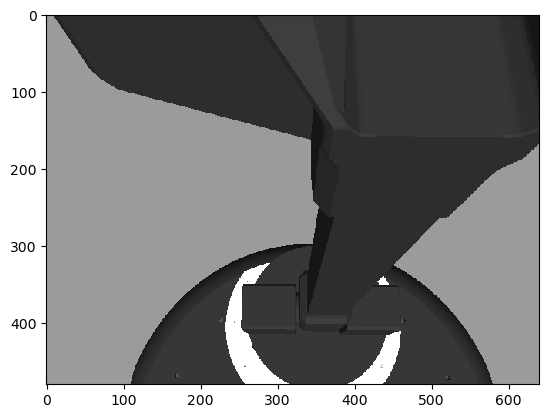

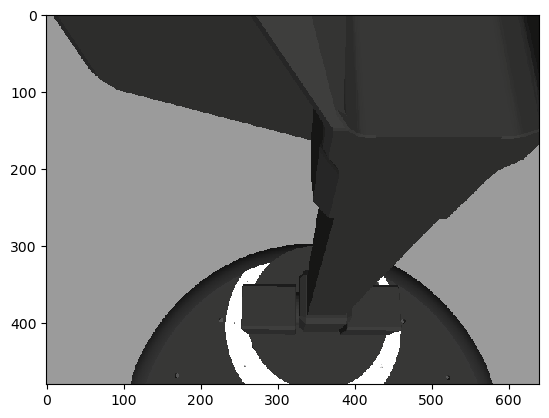

In [7]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl

arm_control = LocobotArmControl()
cam = LocobotCamera()
arm_control.move_arm([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


image = cam.get_image()
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

arm_control.move_arm([0.0, 0.0, 0.5, 0.0, 0.0, 0.0])

image = cam.get_image()
import matplotlib.pyplot as plt
plt.imshow(image)


In [8]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np


arm_control = LocobotArmControl()
cam = LocobotCamera()
# arm_control.move_arm_joints([0.0, -0.4, 0.8, 0.0, 0.0, 0.0])



# build your target Pose
target_pose = Pose()
target_pose.position.x = 0.5
target_pose.position.y = 0.0
target_pose.position.z = 0.15
target_pose.orientation.w = 1.0  # keep it above the table!

# make a quaternion for (roll=0, pitch=−90°, yaw=0)
q = quaternion_from_euler(0, np.pi/2, 0)

# assign it
target_pose.orientation.x = q[0]
target_pose.orientation.y = q[1]
target_pose.orientation.z = q[2]
target_pose.orientation.w = q[3]


arm_control.go_to_pose(target_pose)


[INFO] [1745617891.713163, 13.818000]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745617891.723105, 13.819000]: Joint‐space action server ready
[ INFO] [1745617892.130302329, 14.142000000]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745617893.170639, 14.931000]: LocobotArmControl initialized


True

In [ ]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np


arm_control = LocobotArmControl()

[INFO] [1745619782.319249, 0.000000]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745619782.585564, 53.093000]: Joint‐space action server ready
[ INFO] [1745619782.623507555]: Loading robot model 'locobot'...
[ INFO] [1745619782.623524909]: No root/virtual joint specified in SRDF. Assuming fixed joint
[ INFO] [1745619783.867552830, 54.112000000]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745619783.873512, 54.116000]: LocobotArmControl initialized


[ WARN] [1745619782.621330594]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622351262]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622382416]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622398808]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622417338]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622432487]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622451054]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622465900]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745619782.622482971]: Link 'locobot/ca

[ WARN] [1745619798.230731242, 65.469000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 65.449000 according to authority unknown_publisher
[ WARN] [1745619872.022456026, 122.578000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 122.561000 according to authority unknown_publisher
[ WARN] [1745619904.596926264, 148.804000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 148.780000 according to authority unknown_publisher
[ WARN] [1745619908.601702070, 151.968000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 151.947000 according to authority unknown_publisher
[ WARN] [1745619948.285071063, 183.949000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_foot

In [11]:
def go_grab_cube():
    # build your target Pose
    target_pose = Pose()
    target_pose.position.x = 0.25
    target_pose.position.y = 0.25
    target_pose.position.z = 0.1
    target_pose.orientation.w = 1.0  # keep it above the table!

    target_pose_down = target_pose
    target_pose_down.position.z = 0.05

    # make a quaternion for (roll=0, pitch=−90°, yaw=0)
    q = quaternion_from_euler(0, np.pi/2, 0)

    # assign it
    target_pose.orientation.x = q[0]
    target_pose.orientation.y = q[1]
    target_pose.orientation.z = q[2]
    target_pose.orientation.w = q[3]

    arm_control.move_gripper(0.2)
    arm_control.go_to_pose(target_pose)
    arm_control.go_to_pose(target_pose_down)
    arm_control.move_gripper(0.0)



go_grab_cube()

KeyboardInterrupt: 

In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np


arm_control = LocobotArmControl()
cam = LocobotCamera()

points = cam.get_points()

[INFO] [1745617210.620091, 917.496000]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745617210.621436, 917.515000]: Joint‐space action server ready
[ INFO] [1745617211.471465402, 918.218000000]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745617212.058286, 918.697000]: LocobotArmControl initialized


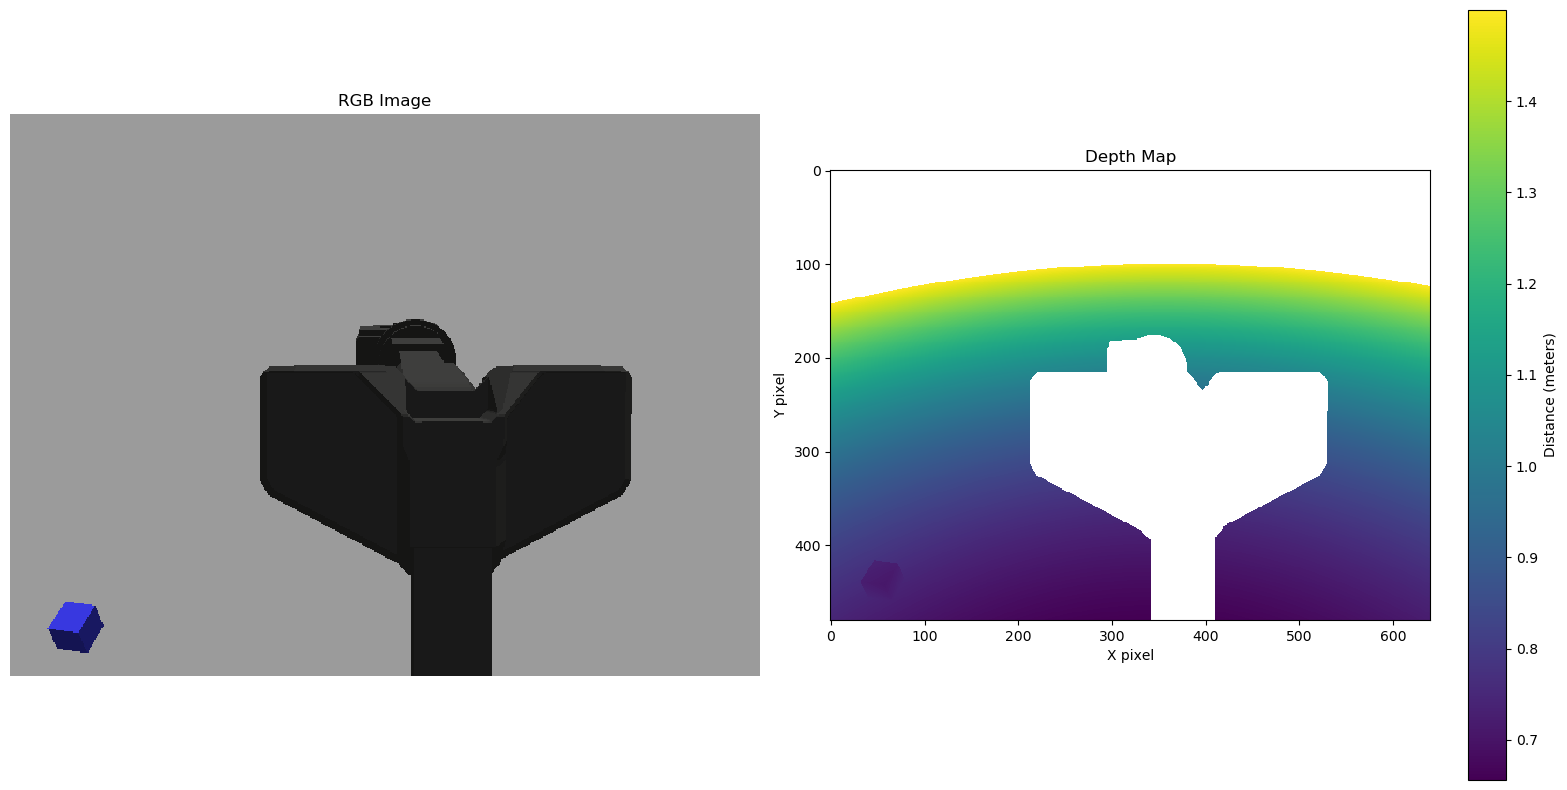

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visioncraft.locobot.camera import LocobotCamera
import rospy

def visualize_depth_map(cam, min_distance=0.5, max_distance=1.5):
    """
    Create a depth map visualization and show the RGB image using matplotlib
    """
    # Get the image
    img = cam.get_image()
    if img is None:
        print("No image received")
        return
        
    height, width = img.shape[:2]
    
    # Create depth map
    depth_map = np.full((height, width), np.nan)
    
    # Fill depth map with distances
    for y in range(height):
        for x in range(width):
            point = cam.get_point_at_pixel(x, y)
            if point is not None:
                # Calculate distance from camera (Euclidean distance)
                distance = np.sqrt(point[0]**2 + point[1]**2 + point[2]**2)
                if min_distance <= distance <= max_distance:
                    depth_map[y, x] = distance  # Only keep valid distances
    
    # Create visualization
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot RGB image
    axs[0].imshow(img)
    axs[0].set_title('RGB Image')
    axs[0].axis('off')
    
    # Plot depth map
    depth_plot = axs[1].imshow(depth_map, cmap='viridis')
    axs[1].set_title('Depth Map')
    axs[1].set_xlabel('X pixel')
    axs[1].set_ylabel('Y pixel')
    fig.colorbar(depth_plot, ax=axs[1], label='Distance (meters)')
    
    plt.tight_layout()
    plt.show()

def main():
    cam = LocobotCamera()
    cam.pan(0.0)
    cam.tilt(0.6)
    
    # Wait for some data to be received
    rospy.sleep(1.0)
    
    # Visualize depth map and image
    visualize_depth_map(cam)

if __name__ == '__main__':
    main()


In [8]:
import numpy as np

def export_point_cloud(points, filename="point_cloud.xyz"):
    """
    Export point cloud to XYZ format (compatible with CloudCompare)
    
    Args:
        points: numpy array of shape (N, 3) containing x,y,z coordinates
        filename: output filename (default: point_cloud.xyz)
    """
    if points is None or len(points) == 0:
        print("No points to export")
        return
        
    # Save points to XYZ file
    np.savetxt(filename, points, delimiter=' ', fmt='%.6f')
    print(f"Point cloud saved to {filename}")

# Example usage:
from visioncraft.locobot.camera import LocobotCamera
import rospy

def main():
    cam = LocobotCamera()
    cam.pan(0.0)
    cam.tilt(0.45)
    
    # Wait for some points to be received
    rospy.sleep(1.0)
    
    # Get points and export
    points = cam.get_points()
    if points is not None:
        export_point_cloud(points, "locobot_points.xyz")
    else:
        print("No points received")

if __name__ == '__main__':
    main()

[ WARN] [1745617395.058733250, 1056.236000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 1056.202000 according to authority unknown_publisher
[ WARN] [1745617401.423077452, 1061.011000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 1060.989000 according to authority unknown_publisher


Point cloud saved to locobot_points.xyz


In [3]:
#!/usr/bin/env python3
import rospy
import actionlib
from moveit_commander import MoveGroupCommander, roscpp_initialize, roscpp_shutdown
from geometry_msgs.msg import Pose
import sys

class LocobotArmWithMoveIt:
    def __init__(self):
        roscpp_initialize(sys.argv)

        # This name must match the MoveIt group in your SRDF
        self.group = MoveGroupCommander("interbotix_arm")

    def go_to_pose(self, target_pose: Pose, wait=True):
        # tell MoveIt the desired end-effector pose
        self.group.set_pose_target(target_pose)

        # plan and execute
        plan = self.group.plan()          # plan() returns (success_flag, plan, planning_time, error_code)
        if not plan:
            rospy.logerr("MoveIt failed to find a plan")
            return False

        self.group.execute(plan[1], wait=wait)
        self.group.clear_pose_targets()
        return True

    def shutdown(self):
        roscpp_shutdown()

if __name__ == "__main__":
    arm = LocobotArmWithMoveIt()

    # build a sample pose
    pose = Pose()
    pose.position.x = 0.3
    pose.position.y = 0.0
    pose.position.z = 0.4
    pose.orientation.w = 1.0

    success = arm.go_to_pose(pose)
    if success:
        rospy.loginfo("Reached target pose!")
    arm.shutdown()


[ERROR] [1745616155.116252328, 92.356000000]: Robot model parameter not found! Did you remap 'robot_description'?
[FATAL] [1745616155.116428260, 92.356000000]: Unable to construct robot model. Please make sure all needed information is on the parameter server.


RuntimeError: Unable to construct robot model. Please make sure all needed information is on the parameter server.

In [ ]:
from visioncraft.locobot.arm_control import LocobotArmControl

arm_control = LocobotArmControl()

# Define preset positions
positions = {
    'home': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'up': [0.0, -1.0, 0.0, 0.0, 0.0, 0.0],
    'forward': [0.0, 0.0, -1.5, 0.0, 0.0, 0.0],
    'side': [1.5, 0.0, 0.0, 0.0, 0.0, 0.0],
    'ready': [0.0, -0.5, -0.5, 0.0, 0.0, 0.0]
}



arm_control.move_arm(positions['side'])

arm_control.move_gripper(0.05)  # Fully open
arm_control.move_gripper(0.0)   # Fully closed

# arm_control.print_current_positions()

trajectory_example = [
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.3, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    [0.3, 0.2, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
]

import numpy as np
speed = 0.5
for i, traj in enumerate(trajectory_example):
    if i >= 1:
        past_traj = trajectory_example[i-1]
    else:
        past_traj = [1.5, 0.0, 0.0, 0.0, 0.0, 0.0]
    
    time_needed = np.linalg.norm(np.array(traj)-np.array(past_traj))/speed
    arm_control.move_arm(traj, time_needed)


ROSException: rospy.init_node() has already been called with different arguments: ('locobot_camera_node', ['/home/vscode/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--f=/home/vscode/.local/share/jupyter/runtime/kernel-v327375896d1cad053d1d7e134108bd2b758e90e29.json'], True, None, False, False)

In [28]:
from geometry_msgs.msg import Pose


target_pose = Pose()
target_pose.position.x    = 0.4
target_pose.position.y    = 0.0
target_pose.position.z    = 0.0
target_pose.orientation.w = 1.0 

In [7]:
cam.pan(0.0)
cam.tilt(0.45)

[ WARN] [1745617392.290461957, 1054.113000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame locobot/base_footprint (parent locobot/odom) at time 1054.083000 according to authority unknown_publisher


In [5]:
from visioncraft.locobot.arm_control import LocobotArmControl

arm_control = LocobotArmControl()

# Define preset positions
positions = {
    'home': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'up': [0.0, -1.0, 0.0, 0.0, 0.0, 0.0],
    'forward': [0.0, 0.0, -1.5, 0.0, 0.0, 0.0],
    'side': [1.5, 0.0, 0.0, 0.0, 0.0, 0.0],
    'ready': [0.0, -0.5, -0.5, 0.0, 0.0, 0.0]
}



arm_control.move_arm(positions['side'])

arm_control.move_gripper(0.05)  # Fully open
arm_control.move_gripper(0.0)   # Fully closed

# arm_control.print_current_positions()

trajectory_example = [
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.3, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    [0.3, 0.2, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
]

import numpy as np
speed = 0.5
for i, traj in enumerate(trajectory_example):
    if i >= 1:
        past_traj = trajectory_example[i-1]
    else:
        past_traj = [1.5, 0.0, 0.0, 0.0, 0.0, 0.0]
    
    time_needed = np.linalg.norm(np.array(traj)-np.array(past_traj))/speed
    arm_control.move_arm(traj, time_needed)


ROSException: rospy.init_node() has already been called with different arguments: ('locobot_camera_node', ['/home/vscode/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--f=/home/vscode/.local/share/jupyter/runtime/kernel-v327375896d1cad053d1d7e134108bd2b758e90e29.json'], True, None, False, False)

In [3]:
import numpy as np
speed = 0.5
for i, traj in enumerate(trajectory_example):
    if i >= 1:
        past_traj = trajectory_example[i-1]
    else:
        past_traj = [1.5, 0.0, 0.0, 0.0, 0.0, 0.0]
    
    time_needed = np.linalg.norm(np.array(traj)-np.array(past_traj))/speed
    arm_control.move_arm(traj, time_needed)


In [21]:
arm_control.get_current_joint_positions()

{'right_wheel_joint': 5.190643654403419, 'left_wheel_joint': 4.003485836651409}

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import gymnasium as gym
import panda_gym
import visioncraft
from stable_baselines3 import DDPG
from stable_baselines3.common.monitor import Monitor
import time

run_id = "ddpg_widowx_reach" + str(int(time.time()))

env = gym.make("WidowXReach-v0")

env = gym.wrappers.RecordVideo(
    env,
    f"./training_videos",
    episode_trigger=lambda x: x % 100 == 0,
)
env = Monitor(env)


model = DDPG(
    policy="MultiInputPolicy",
    env=env,
    tensorboard_log=f"runs/{run_id}",
    verbose=1,
    device="cuda",
    batch_size=2048,
)
model.learn(300_000)

In [ ]:
import gymnasium as gym
import panda_gym
from stable_baselines3 import DDPG
from stable_baselines3.common.monitor import Monitor
import time

run_id = "ddpg_panda_reach" + str(int(time.time()))

env = gym.make("PandaPickAndPlace-v3")

env = gym.wrappers.RecordVideo(
    env,
    f"./training_videos",
    episode_trigger=lambda x: x % 100 == 0,
)
env = Monitor(env)


model = DDPG(
    policy="MultiInputPolicy",
    env=env,
    tensorboard_log=f"runs/{run_id}",
    verbose=1,
    device="cuda",
    batch_size=2048,
)
model.learn(1_500_000)

2025-04-01 22:33:40.364669: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 22:33:40.377080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743561220.388087 2958973 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743561220.391164 2958973 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743561220.399434 2958973 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/simon/anaconda3/envs/bombadilv2/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/simon/anaconda3/envs/bombadilv2/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/simon/anaconda3/envs/bombadilv2/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

AttributeError: _ARRAY_API not found

pybullet build time: Jan 29 2025 23:17:20
/home/simon/anaconda3/envs/bombadilv2/lib/python3.11/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/simon/workspace/UdeM/IFT6163/VisionCraft/notebooks/training_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
Using cuda device
Wrapping the env in a DummyVecEnv.
Logging to runs/ddpg_panda_reach1743561222/DDPG_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -50      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 20       |
|    time_elapsed    | 9        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | 1.41     |
|    critic_loss     | 0.000881 |
|    learning_rate   | 0.001    |
|    n_updates       | 99       |
---------------------------------


In [ ]:
import visioncraft
import time
import gymnasium as gym

In [ ]:
# Load environment and model
env = gym.make("WidowXMultiplePickAndPlace-v0", render_mode="human")
env.reset()
for i in range(10):
    print(env.action_space.sample())

env.close()

error: Only one local in-process GUI/GUI_SERVER connection allowed. Use DIRECT connection mode or start a separate GUI physics server (ExampleBrowser, App_SharedMemoryPhysics_GUI, App_SharedMemoryPhysics_VR) and connect over SHARED_MEMORY, UDP or TCP instead.

In [ ]:
import visioncraft
import time
import gymnasium as gym
import numpy as np

# Load environment and model
env = gym.make("WidowXMultiplePickAndPlace-v0", render_mode="human")
env.reset()


# Testing phase
episodes = 1

for episode in range(100):
    action = env.action_space.sample()
    # print(action[-1])
    action = np.zeros(4)
    action[3] = episode / 100 * 2 - 1
    # print(action[3])
    obs, reward, terminated, truncated, info = env.step(action)
    # print(reward)
    env.render()
    done = terminated or truncated  # Proper termination handling
    time.sleep(0.2)

env.close()
print("Testing complete.")

argv[0]=--background_color_red=0.8745098114013672
argv[1]=--background_color_green=0.21176470816135406
argv[2]=--background_color_blue=0.1764705926179886
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=5
argv[0] = --unused
argv[1] = --background_color_red=0.8745098114013672
argv[2] = --background_color_green=0.21176470816135406
argv[3] = --background_color_blue=0.1764705926179886
argv[4] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 4070/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 550.120
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 550.120
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 4070/PCIe/SSE2
b3Printf

KeyboardInterrupt: 